## DecisionTree


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

%run "../util/funciones.ipynb"

In [2]:
#Carga de datos
df=pd.read_csv('../data/processed/cancer_limpio.csv')
df.head(10)

,perimeter_worst,area_worst,radius_worst,perimeter_mean,radius_mean,area_se,area_mean,perimeter_se,texture_worst,texture_mean,radius_se,concavity_worst,compactness_worst,concave points_worst,diagnosis
0,99.70,711.2,15.110,87.46,13.540,23.560,566.3,2.058,19.26,14.36,0.2699,0.23900,0.17730,0.12880,0
1,96.09,630.5,14.500,85.63,13.080,14.670,520.0,1.383,20.49,15.71,0.1852,0.18900,0.27760,0.07283,0
2,65.13,314.9,10.230,60.34,9.504,15.700,273.9,1.909,15.66,12.44,0.2773,0.08867,0.11480,0.06227,0
3,84.46,545.9,13.300,82.61,13.030,14.160,523.8,1.170,22.81,18.42,0.1839,0.04833,0.04619,0.05013,0
4,57.26,242.2,8.964,51.71,8.196,8.205,201.9,1.094,21.96,16.84,0.1563,0.06880,0.13570,0.02564,0
5,89.88,582.6,13.760,78.04,12.050,19.870,449.3,1.848,20.70,14.63,0.2636,0.30500,0.21560,0.06548,0
6,99.00,698.8,15.150,86.91,13.490,20.200,561.0,1.735,31.82,22.30,0.2338,0.22820,0.17110,0.12820,0
7,82.98,516.5,12.980,74.72,11.760,28.470,427.9,2.635,25.72,21.60,0.4062,0.05523,0.08615,0.03715,0
8,96.08,656.7,14.670,87.21,13.640,14.550,571.8,1.449,23.19,16.34,0.1872,0.10500,0.15820,0.08586,0
9,83.67,527.2,13.100,75.71,11.940,17.470,437.6,1.520,21.33,18.24,0.2273,0.09203,0.08906,0.06296,0


Train & Test

In [3]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

DecisionTreeClassifier

In [5]:
tree_clas = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clas.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
predicciones_tree = tree_clas.predict(x_test_scaled)
print(classification_report(y_test, predicciones_tree))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       279
           1       0.96      0.89      0.92       148

    accuracy                           0.95       427
   macro avg       0.95      0.94      0.94       427
weighted avg       0.95      0.95      0.95       427



In [7]:
tree_clas.score(x_test_scaled,y_test)

0.9484777517564403

In [8]:
tree_clas.feature_importances_

array([0.02218141, 0.93814371, 0.        , 0.02076688, 0.        ,
       0.00340442, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01550358, 0.        , 0.        ])

In [9]:
#Resultados validacion cruzada
score = ['f1','precision','accuracy','recall']

for sc in score:
    rendimiento_tree_cls = cross_val_score(tree_clas, x_train_scaled, y_train, cv=5, scoring= sc)
    rendimiento_medio_tree_cls = rendimiento_tree_cls.mean()

    print('rendimiento medio', sc,':',rendimiento_medio_tree_cls)

rendimiento medio f1 : 0.9312544742377116
rendimiento medio precision : 0.9776928202565385
rendimiento medio accuracy : 0.95
rendimiento medio recall : 0.8894592888701872


[Text(0.5769230769230769, 0.875, 'x[1] <= -0.004\ngini = 0.472\nsamples = 1280\nvalue = [792, 488]'),
 Text(0.3076923076923077, 0.625, 'x[0] <= -0.417\ngini = 0.12\nsamples = 840\nvalue = [786, 54]'),
 Text(0.15384615384615385, 0.375, 'x[1] <= -0.518\ngini = 0.017\nsamples = 580\nvalue = [575, 5]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.011\nsamples = 538\nvalue = [535, 3]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.091\nsamples = 42\nvalue = [40, 2]'),
 Text(0.46153846153846156, 0.375, 'x[3] <= -0.498\ngini = 0.306\nsamples = 260\nvalue = [211, 49]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.272\nsamples = 252\nvalue = [211, 41]'),
 Text(0.8461538461538461, 0.625, 'x[5] <= 0.002\ngini = 0.027\nsamples = 440\nvalue = [6, 434]'),
 Text(0.7692307692307693, 0.375, 'x[11] <= -0.337\ngini = 0.272\nsamples = 37\nvalue = [6, 31]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'

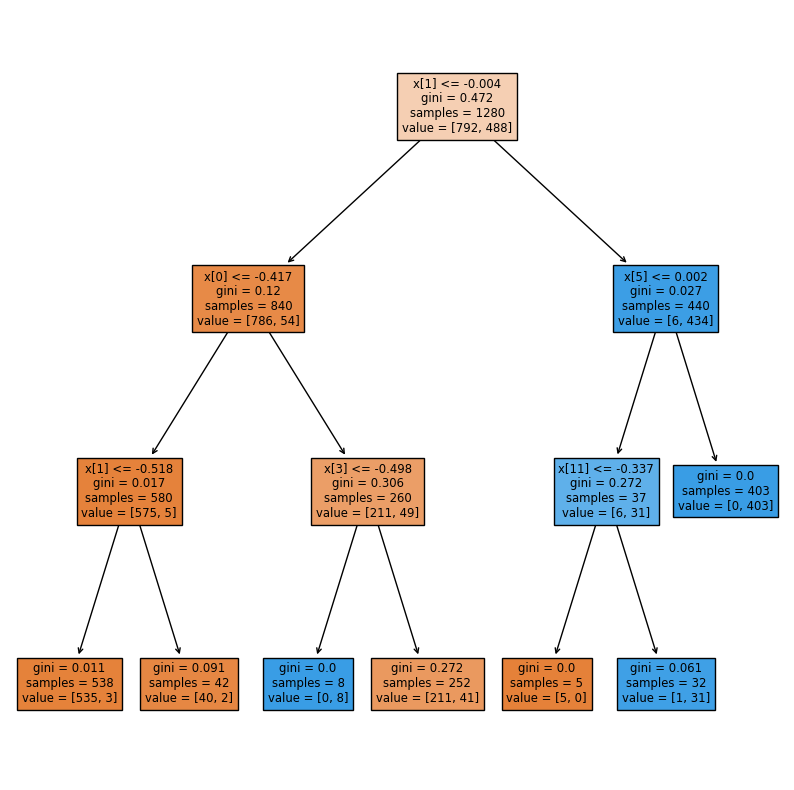

In [10]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clas,filled = True)

[[273   6]
 [ 16 132]]


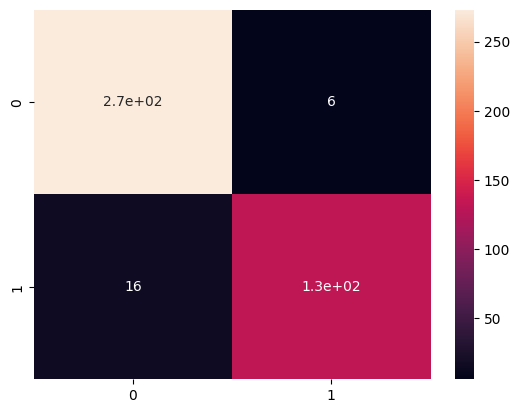

In [11]:
c_matrix_tree = confusion_matrix(y_test, predicciones_tree)
sns.heatmap(c_matrix_tree, annot=True)
print(c_matrix_tree)

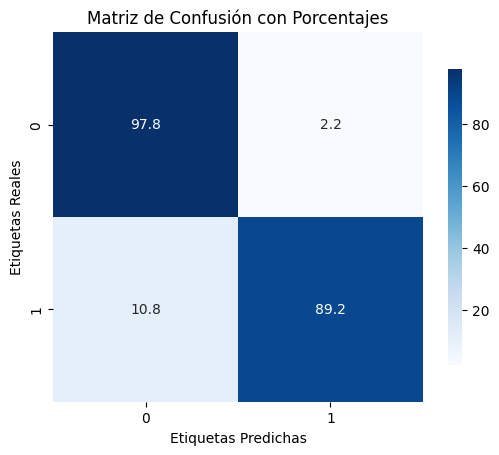

In [12]:
matriz_porcentajes(c_matrix_tree)

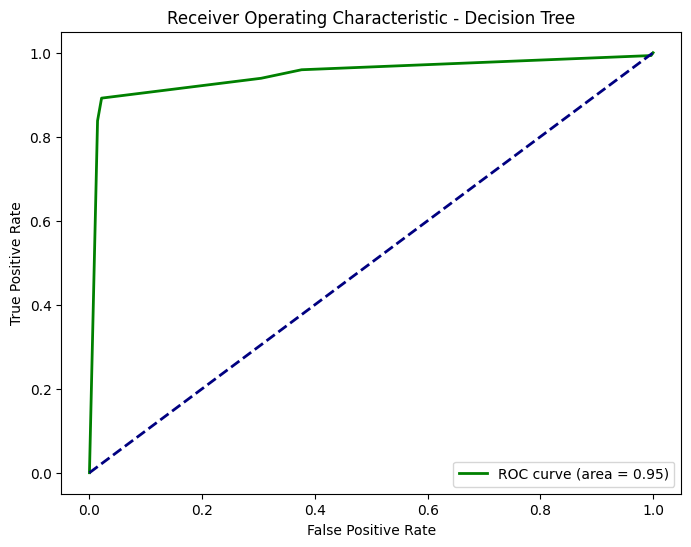

In [13]:
curva_ROC('Decision Tree',tree_clas,x_test_scaled,y_test)

DecisionTreeClasifier GridSearchCV y cross_val

In [14]:
param_grid = {
    'max_depth': [2, 3, 5,],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(tree_clas, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
mejores_parametros_tree = grid_search.best_params_
mejor_modelo_tree = grid_search.best_estimator_

print('Resultado de validacion cruzada:')
for sc in score:
    rendimiento_tree = cross_val_score(mejor_modelo_tree, x_train_scaled, y_train, cv=5, scoring=sc)
    rendimiento_medio_tree = rendimiento_tree.mean()
    print('rendimiento medio', sc,':',rendimiento_medio_tree)
print('mejores parametros:',mejores_parametros_tree)

Resultado de validacion cruzada:
rendimiento medio f1 : 0.9332807642990453
rendimiento medio precision : 0.9820922880124741
rendimiento medio accuracy : 0.9515625
rendimiento medio recall : 0.8894382495266147
mejores parametros: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
predicciones_mejor_modelo_tree = mejor_modelo_tree.predict(x_test_scaled)
print(classification_report(y_test, predicciones_mejor_modelo_tree))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       279
           1       0.98      0.87      0.92       148

    accuracy                           0.95       427
   macro avg       0.96      0.93      0.94       427
weighted avg       0.95      0.95      0.95       427



In [16]:
mejor_modelo_tree.score(x_test_scaled,y_test)

0.9484777517564403

In [17]:
mejor_modelo_tree.feature_importances_

array([0.0230225 , 0.97344399, 0.        , 0.        , 0.        ,
       0.00353351, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

[Text(0.5, 0.8333333333333334, 'x[1] <= -0.004\ngini = 0.472\nsamples = 1280\nvalue = [792, 488]'),
 Text(0.25, 0.5, 'x[0] <= -0.417\ngini = 0.12\nsamples = 840\nvalue = [786, 54]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.017\nsamples = 580\nvalue = [575, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.306\nsamples = 260\nvalue = [211, 49]'),
 Text(0.75, 0.5, 'x[5] <= 0.002\ngini = 0.027\nsamples = 440\nvalue = [6, 434]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [6, 31]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 403\nvalue = [0, 403]')]

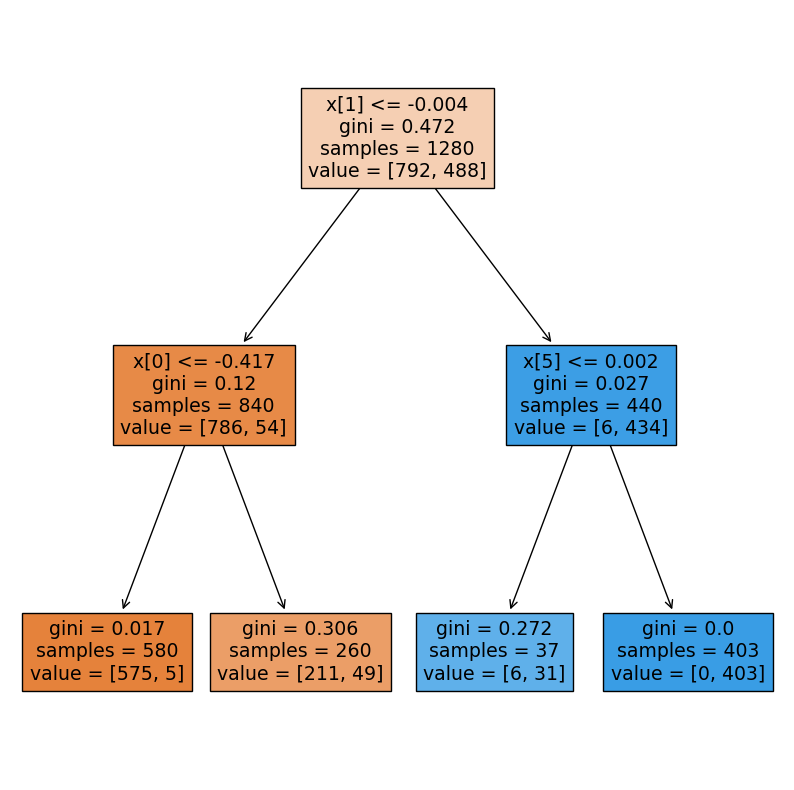

In [18]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(mejor_modelo_tree,filled = True)

[[276   3]
 [ 19 129]]


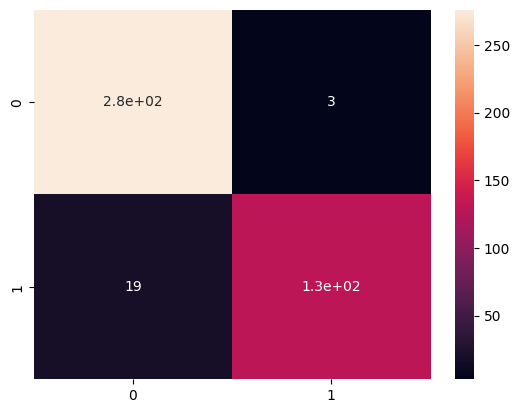

In [19]:
c_matrix_mejor_modelo_tree = confusion_matrix(y_test, predicciones_mejor_modelo_tree)
sns.heatmap(c_matrix_mejor_modelo_tree, annot=True)
print(c_matrix_mejor_modelo_tree)

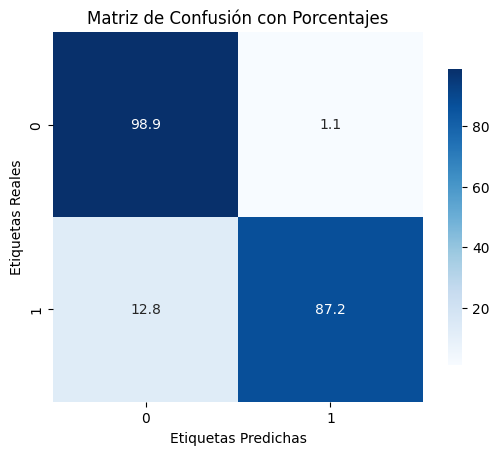

In [20]:
matriz_porcentajes(c_matrix_mejor_modelo_tree)

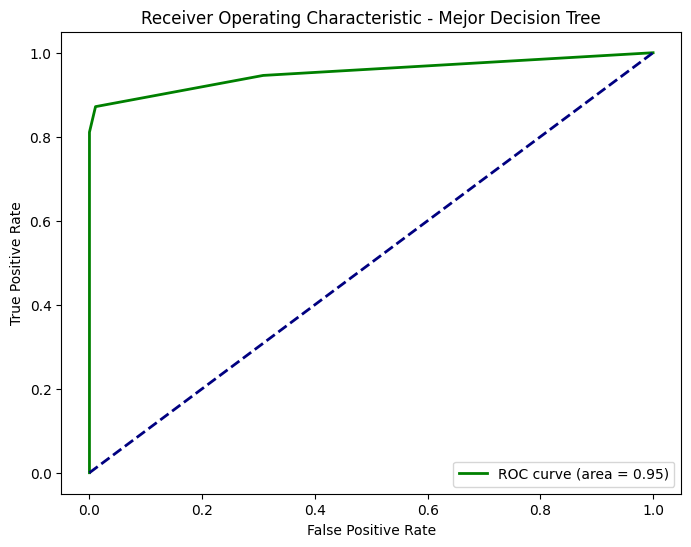

In [21]:
curva_ROC('Mejor Decision Tree',mejor_modelo_tree,x_test_scaled,y_test)

Guardamos modelo

In [22]:
import pickle

with open('../model/modelo_decisionTree.pkl', 'wb') as archivo:
    pickle.dump(tree_clas, archivo)

In [23]:
with open('../model/modelo_decisionTreeGrid.pkl', 'wb') as archivo:
    pickle.dump(mejor_modelo_tree, archivo)